In [1]:
# Exploratory analysis to investigate correlation between
# Country/region's GDP growth rate and use of sustainable 
# actions for environemntal and social considerations
import pandas as pd
from pandas import DataFrame
from pandas import concat
from pandas import read_csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
from math import sqrt
from numpy import median
from numpy import mean
from numpy import std
from numpy import array
from sklearn.metrics import mean_squared_error
import os
import datetime
import IPython
import IPython.display
import seaborn as sns
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [2]:
# read in csv data file
df = pd.read_csv('ESGData.csv')
df_country = pd.read_csv('ESGCountry.csv')

In [3]:
# filter dataframe for GDP
gdp    = df['Indicator Name'] == 'GDP growth (annual %)'
df_gdp = df[gdp]
df_gdp[['Country Name','Indicator Name','2014']].head()

,Country Name,Indicator Name,2014
23,Arab World,GDP growth (annual %),2.505076
90,Caribbean small states,GDP growth (annual %),0.489818
157,Central Europe and the Baltics,GDP growth (annual %),2.991151
224,Early-demographic dividend,GDP growth (annual %),3.997934
291,East Asia & Pacific,GDP growth (annual %),4.190319


In [4]:
country = df_gdp['Country Name'].to_list()
#print(country)
gdp_list = df_gdp['2014'].to_list()
#print(gdp_list)

In [5]:
# filter dataframe for Renewable Energy Consumption
#rnw = df[['Country Name','Indicator Name','2015']]
#RnwEngy = rnw.rename(columns={'2015': 'rnw2015'})
#nwEngy.loc[RnwEngy['Indicator Name'] == 'Renewable energy consumption (% of total final energy consumption)']

rnw    = df['Indicator Name'] == 'Renewable energy consumption (% of total final energy consumption)'
#rnw    = df['Indicator Name'] == 'Renewable electricity output (% of total electricity output)'

df_rnw = df[rnw]
df_rnw[['Country Name','Indicator Name','2014']].head()


,Country Name,Indicator Name,2014
56,Arab World,Renewable energy consumption (% of total final...,4.170017
123,Caribbean small states,Renewable energy consumption (% of total final...,8.548253
190,Central Europe and the Baltics,Renewable energy consumption (% of total final...,17.041243
257,Early-demographic dividend,Renewable energy consumption (% of total final...,25.607994
324,East Asia & Pacific,Renewable energy consumption (% of total final...,13.753442


In [6]:
rnw_list = df_rnw['2014'].to_list()
#print(rnw_list)

In [7]:
# filter dataframe for Ratio of female to male labor force participation rate (%) (modeled ILO estimate)
ftm    = df['Indicator Name'] == 'Ratio of female to male labor force participation rate (%) (modeled ILO estimate)'
df_ftm = df[ftm]
df_ftm[['Country Name','Indicator Name','2014']].head()

,Country Name,Indicator Name,2014
53,Arab World,Ratio of female to male labor force participat...,31.080850
120,Caribbean small states,Ratio of female to male labor force participat...,74.881462
187,Central Europe and the Baltics,Ratio of female to male labor force participat...,75.473904
254,Early-demographic dividend,Ratio of female to male labor force participat...,45.058037
321,East Asia & Pacific,Ratio of female to male labor force participat...,77.612981


In [8]:
ftm_list = df_ftm['2014'].to_list()
#print(ftm_list)

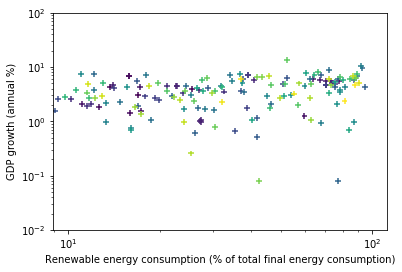

In [9]:
# The above is just to show some of the nubmers obtained from the dataset
# Now let's make some plots to visualize the data

# first let's plot annual GDP % growth rate to Renewable energy consumption and see if there is a positive correlation
cmap = plt.get_cmap('viridis')
mycolors = cmap(np.linspace(0,1,len(country)))

fig = plt.figure()
ax = plt.gca()
ax.set_ylim([0.01,100])
#ax.scatter(rnw_list, gdp_list)
#ax.scatter(rnw_list, gdp_list, s=100,marker='+', mycolors)
ax.scatter(rnw_list, gdp_list,s=35, c=mycolors, marker='+')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Renewable energy consumption (% of total final energy consumption)')
ax.set_ylabel('GDP growth (annual %)')
plt.savefig('environSustainProfit.png')

In [10]:
# filter dataframe for GDP: 'High Income'
incomeHigh    = df_country['Income Group'] == 'High income'
df_incomeHigh = df_country[incomeHigh]
df_IncomeHighGroup = df_incomeHigh.rename(columns={'Table Name': 'Country Name'})
df_IncomeHighGroup[['Country Name','Income Group']].head()

,Country Name,Income Group
3,Andorra,High income
5,United Arab Emirates,High income
8,Antigua and Barbuda,High income
9,Australia,High income
10,Austria,High income


In [11]:
# filter dataframe for GDP: 'Low Income'
incomeLow    = df_country['Income Group'] == 'Low income'
df_incomeLow = df_country[incomeLow]
df_IncomeLowGroup = df_incomeLow.rename(columns={'Table Name': 'Country Name'})
df_IncomeLowGroup[['Country Name','Income Group']].head()

,Country Name,Income Group
0,Afghanistan,Low income
12,Burundi,Low income
15,Burkina Faso,Low income
29,Central African Republic,Low income
37,"Congo, Dem. Rep.",Low income


In [12]:
# filter dataframe for GDP: 'Lower middle Income'
incomeLowMid    = df_country['Income Group'] == 'Lower middle income'
df_incomeLowMid = df_country[incomeLowMid]
df_IncomeLowMidGroup = df_incomeLowMid.rename(columns={'Table Name': 'Country Name'})
df_IncomeLowMidGroup[['Country Name','Income Group']].head()

,Country Name,Income Group
1,Angola,Lower middle income
14,Benin,Lower middle income
16,Bangladesh,Lower middle income
23,Bolivia,Lower middle income
27,Bhutan,Lower middle income


In [13]:
# filter dataframe for GDP: 'Upper middle Income'
incomeUppMid    = df_country['Income Group'] == 'Upper middle income'
df_incomeUppMid = df_country[incomeUppMid]
df_IncomeUppMidGroup = df_incomeUppMid.rename(columns={'Table Name': 'Country Name'})
df_IncomeUppMidGroup[['Country Name','Income Group']].head()

,Country Name,Income Group
2,Albania,Upper middle income
6,Argentina,Upper middle income
7,Armenia,Upper middle income
11,Azerbaijan,Upper middle income
17,Bulgaria,Upper middle income


In [14]:
df_highIncomeRNW    = pd.merge(df_rnw[['Country Name','Indicator Name','2014']], df_IncomeHighGroup[['Country Name','Income Group']], on='Country Name')
#df_highIncomeRNW.head()
df_lowIncomeRNW     = pd.merge(df_rnw[['Country Name','Indicator Name','2014']], df_IncomeLowGroup[['Country Name','Income Group']], on='Country Name')
#df_lowIncomeRNW.head()
df_lowMidIncomeRNW  = pd.merge(df_rnw[['Country Name','Indicator Name','2014']], df_IncomeLowMidGroup[['Country Name','Income Group']], on='Country Name')
#df_lowMidIncomeRNW.head()
df_uppMidIncomeRNW  = pd.merge(df_rnw[['Country Name','Indicator Name','2014']], df_IncomeUppMidGroup[['Country Name','Income Group']], on='Country Name')
#df_uppMidIncomeRNW.head()

In [15]:
df_highIncomeGDP   = pd.merge(df_gdp[['Country Name','Indicator Name','2014']], df_IncomeHighGroup[['Country Name','Income Group']], on='Country Name')
#df_highIncomeGDP.head()
df_lowIncomeGDP   = pd.merge(df_gdp[['Country Name','Indicator Name','2014']], df_IncomeLowGroup[['Country Name','Income Group']], on='Country Name')
#df_lowIncomeGDP.head()
df_lowMidIncomeGDP = pd.merge(df_gdp[['Country Name','Indicator Name','2014']], df_IncomeLowMidGroup[['Country Name','Income Group']], on='Country Name')
#df_lowMidIncomeGDP.head()
df_uppMidIncomeGDP = pd.merge(df_gdp[['Country Name','Indicator Name','2014']], df_IncomeUppMidGroup[['Country Name','Income Group']], on='Country Name')
#df_uppMidIncomeGDP.head()

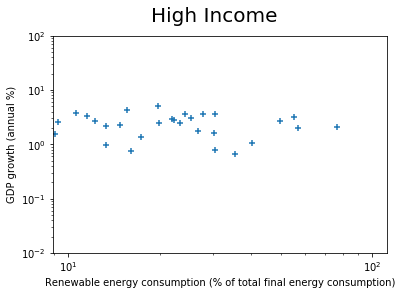

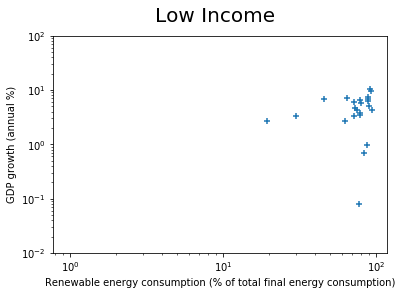

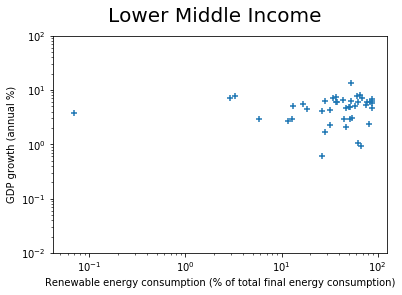

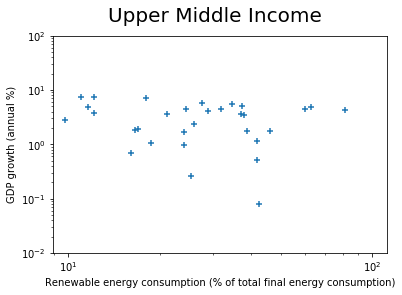

In [17]:
highIncomeRNW_list   = df_highIncomeRNW['2014'].to_list()
highIncomeGDP_list   = df_highIncomeGDP['2014'].to_list()
lowIncomeRNW_list    = df_lowIncomeRNW['2014'].to_list()
lowIncomeGDP_list    = df_lowIncomeGDP['2014'].to_list()
lowMidIncomeRNW_list = df_lowMidIncomeRNW['2014'].to_list()
lowMidIncomeGDP_list = df_lowMidIncomeGDP['2014'].to_list()
uppMidIncomeRNW_list = df_uppMidIncomeRNW['2014'].to_list()
uppMidIncomeGDP_list = df_uppMidIncomeGDP['2014'].to_list()

#HI_cmap = plt.get_cmap('viridis')
#HI_mycolors = cmap(np.linspace(0,1,len(country)))

fig2 = plt.figure()
ax2 = plt.gca()
ax2.set_ylim([0.01,100])
ax2.scatter(highIncomeRNW_list, highIncomeGDP_list,s=35, marker='+')
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_xlabel('Renewable energy consumption (% of total final energy consumption)')
fig2.suptitle('High Income', fontsize=20)
ax2.set_ylabel('GDP growth (annual %)')
plt.savefig('environSustainProfit_highIncome.png')

fig3 = plt.figure()
ax3 = plt.gca()
ax3.set_ylim([0.01,100])
ax3.scatter(lowIncomeRNW_list, lowIncomeGDP_list,s=35, marker='+')
ax3.set_yscale('log')
ax3.set_xscale('log')
ax3.set_xlabel('Renewable energy consumption (% of total final energy consumption)')
fig3.suptitle('Low Income', fontsize=20)
ax3.set_ylabel('GDP growth (annual %)')
plt.savefig('environSustainProfit_lowIncome.png')

fig4 = plt.figure()
ax4 = plt.gca()
ax4.set_ylim([0.01,100])
ax4.scatter(lowMidIncomeRNW_list, lowMidIncomeGDP_list,s=35, marker='+')
ax4.set_yscale('log')
ax4.set_xscale('log')
ax4.set_xlabel('Renewable energy consumption (% of total final energy consumption)')
fig4.suptitle('Lower Middle Income', fontsize=20)
ax4.set_ylabel('GDP growth (annual %)')
plt.savefig('environSustainProfit_lowMidIncome.png')

fig5 = plt.figure()
ax5 = plt.gca()
ax5.set_ylim([0.01,100])
ax5.scatter(uppMidIncomeRNW_list, uppMidIncomeGDP_list,s=35, marker='+')
ax5.set_yscale('log')
ax5.set_xscale('log')
ax5.set_xlabel('Renewable energy consumption (% of total final energy consumption)')
fig5.suptitle('Upper Middle Income', fontsize=20)
ax5.set_ylabel('GDP growth (annual %)')
plt.savefig('environSustainProfit_uppMidIncome.png')

In [18]:
# Let's look at a time series of annual GDP % growth for the years 1980-2019 for The United States.
# filter dataframe for GDP USA
USA_gdp = df.loc[(df['Indicator Name']=='GDP growth (annual %)') & (df['Country Name']=='United States')]
USA_gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2050,Unnamed: 66
15433,United States,USA,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,2.3,6.1,4.4,5.8,6.4,...,1.842081,2.525973,2.908022,1.637838,2.369801,2.927326,2.161176,NaN,NaN,NaN


In [19]:
USA_2009 = USA_gdp.drop(columns=['Country Name','Country Code','Indicator Name','Indicator Code','1960',
                            '2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2050'])
USA_2013 = USA_gdp.drop(columns=['Country Name','Country Code','Indicator Name','Indicator Code','1960',
                            '2014','2015','2016','2017','2018','2019','2020','2050'])
                            #'2020','2050'])

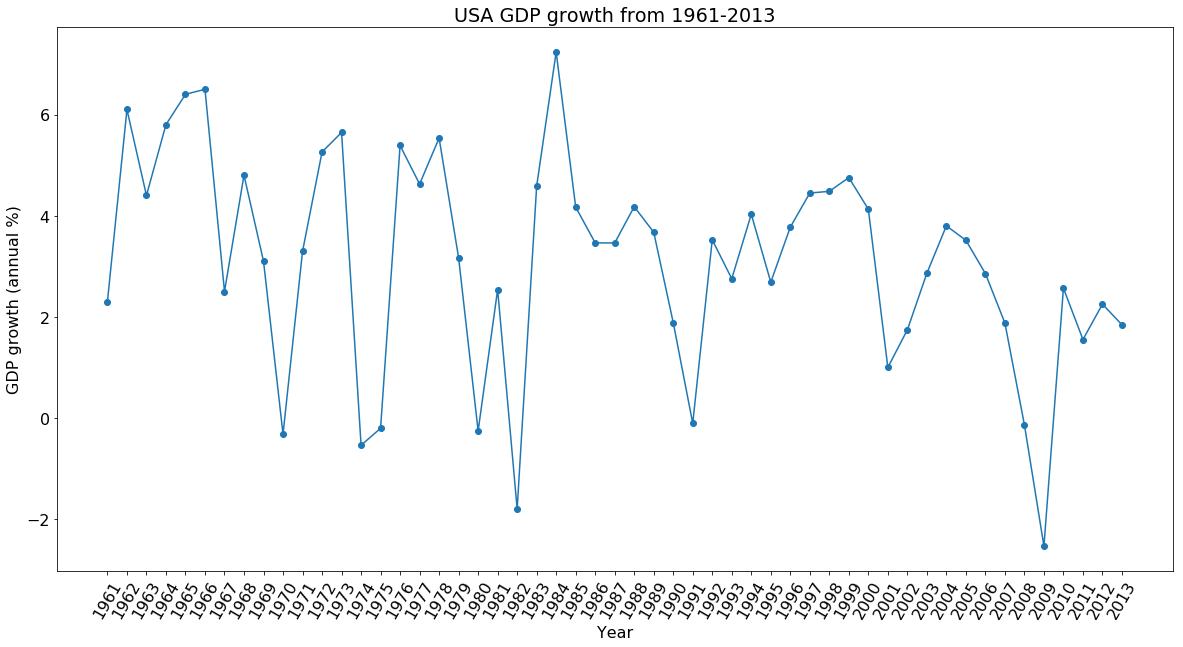

In [20]:
# plot time series GDP for USA: 1961-2013 (will compare forecast to 2014-2019)
# remove NA values
USA_dropna_2013 = USA_2013.dropna(axis='columns')


USA_years_2013 = USA_dropna_2013.columns.values.tolist()
USA_list_2013  = USA_dropna_2013.values.flatten().tolist()
plt.rcParams["figure.figsize"] = (20,10)
matplotlib.rcParams.update({'font.size': 16})
plt.xticks(rotation=60)
plt.title('USA GDP growth from 1961-2013')
plt.xlabel('Year')
plt.ylabel('GDP growth (annual %)')
plt.plot(USA_years_2013, USA_list_2013, '-o')
plt.savefig('USA_GDP_timeseries_1961-2013.png')

In [21]:
# prepare a new data frame for machine learning moel and prediction
USA_ml2013 = pd.DataFrame(USA_years_2013, columns=['Year'])
USA_ml2013['GDP'] = np.array(USA_list_2013)
#print(USA_ml2013)
USA_ml2013.to_csv('myUSA_2013.csv',index=False)
#USA_ml2013.head()

In [22]:
# Supervised Learning Naive Model
# 1. Develop a function to transform time series dataset to a supervised learning dataset
# 2. Transform univariate time series data for machine learning (USA: GDP)
# 3. Sequence Forecasting: ie. predict GDP growth
# 4. Compare Predictions to actual results

# Then make simple Multilayer Perceptron Model
# train on 1961-2013
# predict GDP growth 
# compare results to actual values in 2014-2019 data

In [23]:
# Baseline Naive Model
# fit a model
def model_fit(train, config):
    return None
# define range of shifts
config = [1,2,3,4,5,6,7,8,9,10]
# forecaset with a pre-fit model
def model_predict(model, history, config):
    values = list()
    for offset in config:
        values.append(history[-offset])
    return median(values)

# split dataset into two sets: train and test
def train_test_split(data, n_test):
    return data[:-n_test], data[-n_test:]
# rms (root mean square error)
def measure_rms(actual, predicted):
    return sqrt(mean_squared_error(actual, predicted))

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
    predictions = list()
    # split dataset
    train, test = train_test_split(data, n_test)
    # fit model
    model = model_fit(train, cfg)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in range(len(test)):
        # fit model and make forecast for history
        yhat = model_predict(model, history, cfg)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history.append(test[i])
    # estimate prediction error
    error = measure_rms(test, predictions)
    print( ' > %.3f ' % error)
    return error
# repeat evaluation of a config
def repeat_evaluate(data, config, n_test, n_repeats=30):
    # fit and evaluate the model n times
    scores = [walk_forward_validation(data, n_test, config) 
              for i in range(n_repeats)]
    return scores
# summarize model performance
def summarize_scores(name, scores):
    # print a summary
    scores_m, score_std = mean(scores), std(scores)
    print( ' %s: %.3f RMSE (+/- %.3f) ' % (name, scores_m, score_std))

series = read_csv("myUSA_2013.csv", header=0, index_col=0)    

data = series.values
# data split
n_test = 5
# grid search
scores = repeat_evaluate(data, config, n_test)
# summarize scores
summarize_scores( 'persistence' , scores)

 > 2.446 
 > 2.446 
 > 2.446 
 > 2.446 
 > 2.446 
 > 2.446 
 > 2.446 
 > 2.446 
 > 2.446 
 > 2.446 
 > 2.446 
 > 2.446 
 > 2.446 
 > 2.446 
 > 2.446 
 > 2.446 
 > 2.446 
 > 2.446 
 > 2.446 
 > 2.446 
 > 2.446 
 > 2.446 
 > 2.446 
 > 2.446 
 > 2.446 
 > 2.446 
 > 2.446 
 > 2.446 
 > 2.446 
 > 2.446 
 persistence: 2.446 RMSE (+/- 0.000) 


In [24]:
# this shows that the root mean squar error of the model is 2.45 annual % GDP growth.
# this also gives a lower bound of the performance so that we can compare models


 > 2.026 
 > 2.085 
 > 2.002 
 > 2.207 
 > 2.155 
 > 2.189 
 > 2.208 
 > 2.160 
 > 2.227 
 > 2.209 
 > 2.185 
 > 2.229 
 > 2.277 
 > 2.244 
 > 2.208 
 > 2.094 
 > 2.161 
 > 2.309 
 > 2.222 
 > 2.241 
 > 2.193 
 > 2.166 
 > 2.177 
 > 2.171 
 > 2.106 
 > 2.179 
 > 2.215 
 > 2.138 
 > 2.270 
 > 2.209 
 mlp: 2.182 RMSE (+/- 0.067) 


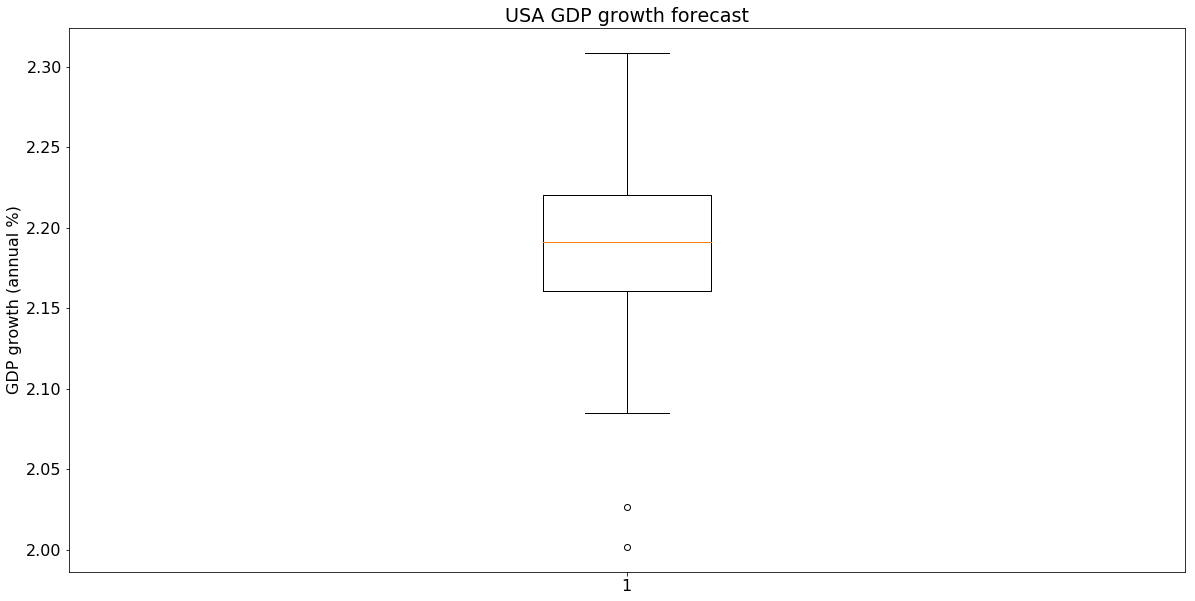

In [25]:
# Next let's use a multilayer perceptron (MLP) to make predictions in 1 year increments (1,2,3,4,5)
# a MLP is a simple feedforward neural network model. We will test this and in the future 
# compare to more complex ML models
# transform list into supervised learning format
def series_to_supervised(data, n_in, n_out=1):
    df = DataFrame(data)
    cols = list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    # put it all together
    agg = concat(cols, axis=1)
    # drop rows with NaN values
    agg.dropna(inplace=True)
    return agg.values
# fit a model
def Model_fit(train, config):
    # unpack config
    n_input, n_nodes, n_epochs, n_batch = config
    # prepare data
    data = series_to_supervised(train, n_input)
    train_x, train_y = data[:, :-1], data[:, -1]
    # define model
    model = Sequential()
    model.add(Dense(n_nodes, activation= 'relu' , input_dim=n_input))
    model.add(Dense(1))
    model.compile(loss= 'mse' , optimizer= 'adam' )
    # fit
    model.fit(train_x, train_y, epochs=n_epochs, batch_size=n_batch, verbose=0)
    return model
# forecast with a pre-fit model
def Model_predict(model, history, config):
    # unpack config
    n_input, _, _, _ = config
    # prepare data
    x_input = array(history[-n_input:]).reshape(1, n_input)
    # forecast
    yhat = model.predict(x_input, verbose=0)
    return yhat[0]
# walk-forward validation for univariate data
def Walk_forward_validation(data, n_test, cfg):
    predictions = list()
    # split dataset
    train, test = train_test_split(data, n_test)
    # fit model
    model = Model_fit(train, cfg)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in range(len(test)):
        # fit model and make forecast for history
        yhat = Model_predict(model, history, cfg)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history.append(test[i])
    # estimate prediction error
    error = measure_rms(test, predictions)
    print( ' > %.3f ' % error)
    return error

# repeat evaluation of a config
def Repeat_evaluate(data, config, n_test, n_repeats=30):
    # fit and evaluate the model n times
    scores = [Walk_forward_validation(data, n_test, config) 
              for i in range(n_repeats)]
    return scores
# summarize model performance
def Summarize_scores(name, scores):
    # print a summary
    scores_m, score_std = mean(scores), std(scores)
    print( ' %s: %.3f RMSE (+/- %.3f) ' % (name, scores_m, score_std))
    # box and whisker plot
    #plt.boxplot(scores)
    #plt.show()
    


Series = read_csv( 'myUSA_2013.csv' , header=0, index_col=0)
Data = Series.values
# data split
N_test = 5
# define config
Config = [10,500,100,100]
# grid search
Scores = Repeat_evaluate(Data, Config, N_test)
# summarize scores
Summarize_scores( 'mlp' , Scores)
matplotlib.rcParams.update({'font.size': 16})
plt.boxplot(Scores)
plt.title('USA GDP growth forecast')
plt.ylabel('GDP growth (annual %)')
plt.savefig('boxplot-forecast-2013_USA_GDP.png')

In [26]:
# NB: any model that achieves a predictive performance lower than the previous naieve model
# of 2.446, in the last 5 years, has skill.
# We have improvement using MLP for forecasting GDP growth with relatively small spread
# Let's see if things improve even further when we use Multivariate model in MLP
# ie. training on GDP growth and renewable energy consumption to predict GDP growth


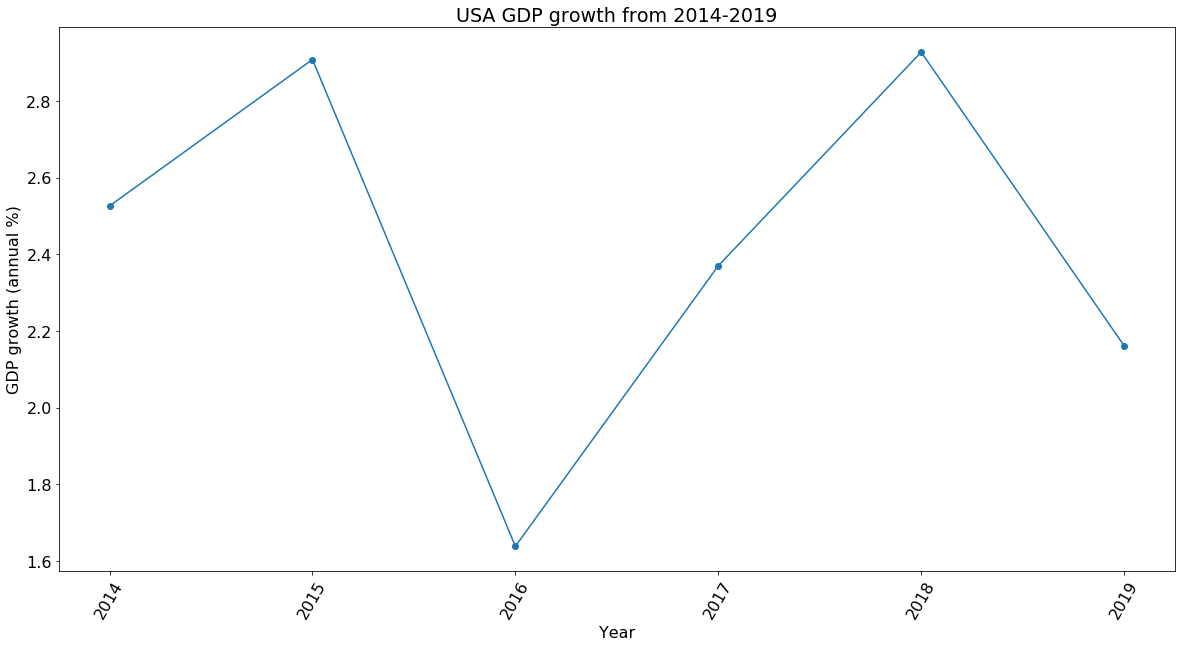

In [27]:
USA_recent = USA_gdp.drop(columns=['Country Name','Country Code','Indicator Name','Indicator Code',
                                   '1960','1961','1962','1963','1964','1965','1966','1967','1968','1969',
                                   '1970','1971','1972','1973','1974','1975','1976','1977','1978','1979',
                                   '1980','1981','1982','1983','1984','1985','1986','1987','1988','1989',
                                   '1990','1991','1992','1993','1994','1995','1996','1997','1998','1999',
                                   '2000','2001','2002','2003','2004','2005','2006','2007','2008','2009',
                                   '2010','2011','2012','2013','2050'])
# plot time series GDP for USA for 2014-2019 to compare to prediction
# remove NA values
USA_2019 = USA_recent.dropna(axis='columns')
USA_2019.head()

USA_Ryears = USA_2019.columns.values.tolist()
USA_Rlist = USA_2019.values.flatten().tolist()
#print(USA_years)
#print(USA_list)


#plt.rcParams["figure.figsize"] = (20,3)
matplotlib.rcParams.update({'font.size': 16})
plt.xticks(rotation=60)
plt.title('USA GDP growth from 2014-2019')
plt.xlabel('Year')
plt.ylabel('GDP growth (annual %)')
plt.plot(USA_Ryears, USA_Rlist, '-o')
plt.savefig('USA_GDP_2014-2019_real.png')

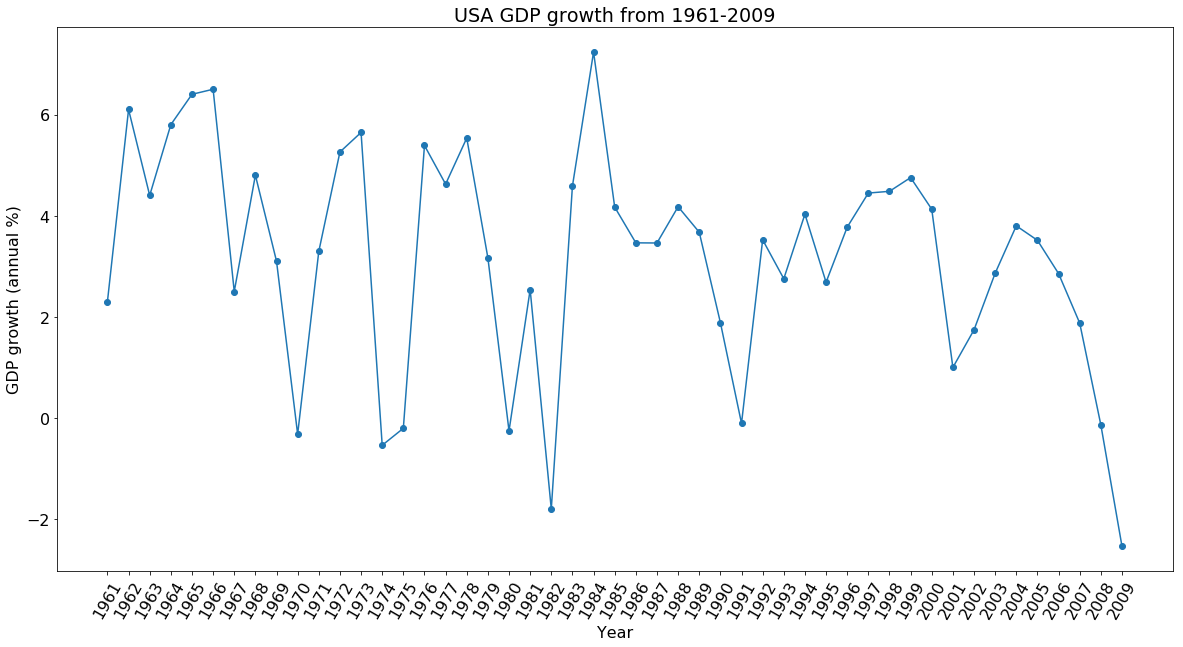

In [28]:
# Try predicting large uptick from 2008-2009
USA_dropna_2009 = USA_2009.dropna(axis='columns')

USA_years_2009 = USA_dropna_2009.columns.values.tolist()
USA_list_2009  = USA_dropna_2009.values.flatten().tolist()
plt.rcParams["figure.figsize"] = (20,10)
matplotlib.rcParams.update({'font.size': 16})
plt.xticks(rotation=60)
plt.title('USA GDP growth from 1961-2009')
plt.xlabel('Year')
plt.ylabel('GDP growth (annual %)')
plt.plot(USA_years_2009, USA_list_2009, '-o')
plt.savefig('USA_GDP_timeseries_1961-2009.png')

In [29]:
# prepare a new data frame for machine learning moel and prediction
USA_ml2009 = pd.DataFrame(USA_years_2009, columns=['Year'])
USA_ml2009['GDP'] = np.array(USA_list_2009)
USA_ml2009.to_csv('myUSA_2009.csv',index=False)
#USA_ml2008.head()

In [30]:
series_2009 = read_csv("myUSA_2009.csv", header=0, index_col=0)    
data_2009   = series_2009.values
# grid search
scores_2009 = repeat_evaluate(data_2009, config, n_test)
# summarize scores
summarize_scores( ' persistence ' , scores_2009)

 > 2.975 
 > 2.975 
 > 2.975 
 > 2.975 
 > 2.975 
 > 2.975 
 > 2.975 
 > 2.975 
 > 2.975 
 > 2.975 
 > 2.975 
 > 2.975 
 > 2.975 
 > 2.975 
 > 2.975 
 > 2.975 
 > 2.975 
 > 2.975 
 > 2.975 
 > 2.975 
 > 2.975 
 > 2.975 
 > 2.975 
 > 2.975 
 > 2.975 
 > 2.975 
 > 2.975 
 > 2.975 
 > 2.975 
 > 2.975 
  persistence : 2.975 RMSE (+/- 0.000) 


 > 2.072 
 > 2.133 
 > 2.102 
 > 2.134 
 > 2.056 
 > 2.163 
 > 1.990 
 > 1.948 
 > 2.109 
 > 2.046 
 > 2.014 
 > 2.049 
 > 2.055 
 > 2.157 
 > 2.039 
 > 2.113 
 > 2.070 
 > 2.080 
 > 1.993 
 > 2.072 
 > 1.928 
 > 2.098 
 > 2.165 
 > 2.153 
 > 2.179 
 > 2.125 
 > 2.110 
 > 2.054 
 > 2.155 
 > 2.050 
 mlp: 2.080 RMSE (+/- 0.063) 


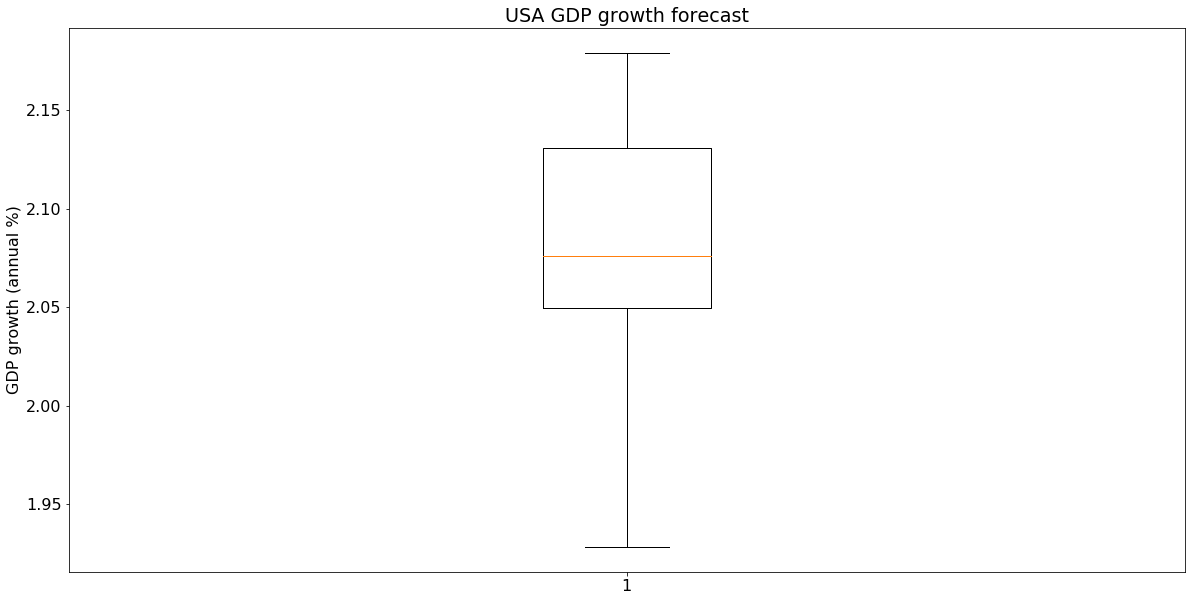

In [31]:
Data_2009 = series_2009.values
# grid search
Scores_2009 = Repeat_evaluate(Data_2009, Config, N_test)
# summarize scores
Summarize_scores( 'mlp' , Scores_2009)
matplotlib.rcParams.update({'font.size': 16})
plt.boxplot(Scores_2009)
plt.title('USA GDP growth forecast')
plt.ylabel('GDP growth (annual %)')
plt.savefig('boxplot-forecast-2009_USA_GDP.png')

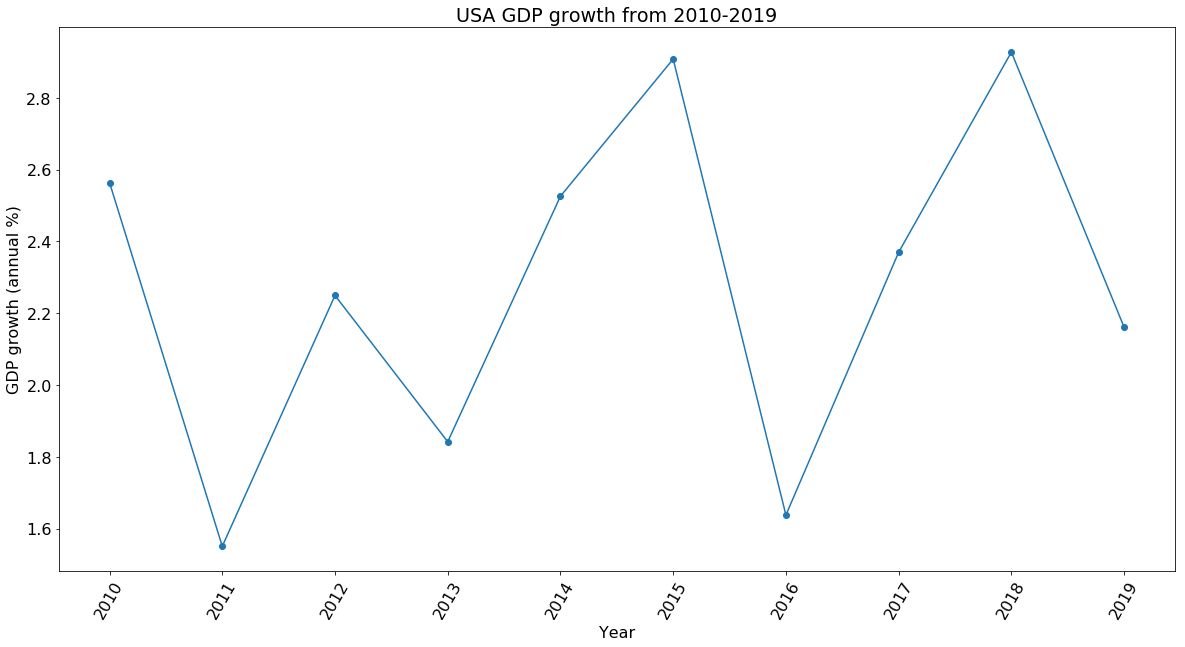

In [32]:
USA_recent_2010 = USA_gdp.drop(columns=['Country Name','Country Code','Indicator Name','Indicator Code',
                                   '1960','1961','1962','1963','1964','1965','1966','1967','1968','1969',
                                   '1970','1971','1972','1973','1974','1975','1976','1977','1978','1979',
                                   '1980','1981','1982','1983','1984','1985','1986','1987','1988','1989',
                                   '1990','1991','1992','1993','1994','1995','1996','1997','1998','1999',
                                   '2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2050',])
# plot time series GDP for USA for 2014-2019 to compare to prediction
# remove NA values
USA_2013 = USA_recent_2010.dropna(axis='columns')
USA_2013.head()

USA_Ryears_2013= USA_2013.columns.values.tolist()
USA_Rlist_2013 = USA_2013.values.flatten().tolist()
#print(USA_years)
#print(USA_list)


#plt.rcParams["figure.figsize"] = (20,3)
matplotlib.rcParams.update({'font.size': 16})
plt.xticks(rotation=60)
plt.title('USA GDP growth from 2010-2019')
plt.xlabel('Year')
plt.ylabel('GDP growth (annual %)')
plt.plot(USA_Ryears_2013, USA_Rlist_2013, '-o')
plt.savefig('USA_GDP_2010-2019_real.png')

In [33]:
# This simple model does a pretty good job at predicting changes in GDP for the next year, even with relatively
# large deltas in GDP growth from year to year.

# Combining my analysis with a multivariate approach, namely using Renewable energy consumption as compliment to 
# GDP growth, i posit, will increase the accuracy of my forecast.

# In this capstone, I want to extend this univariate to multivariate GDP growth forecasting, and apply the 
# Granger Causality Test, which is a statistical hypothesis test for determining whether one time series is useful
# in forecsting another. ie. if X (read: renewable energy consumption) causes Y (read: GDP growth), then the forecast 
# of Y based on previous values of Y *and* the previous values of X should outperform the forecast of Y based on 
# previous values of Y alone. 



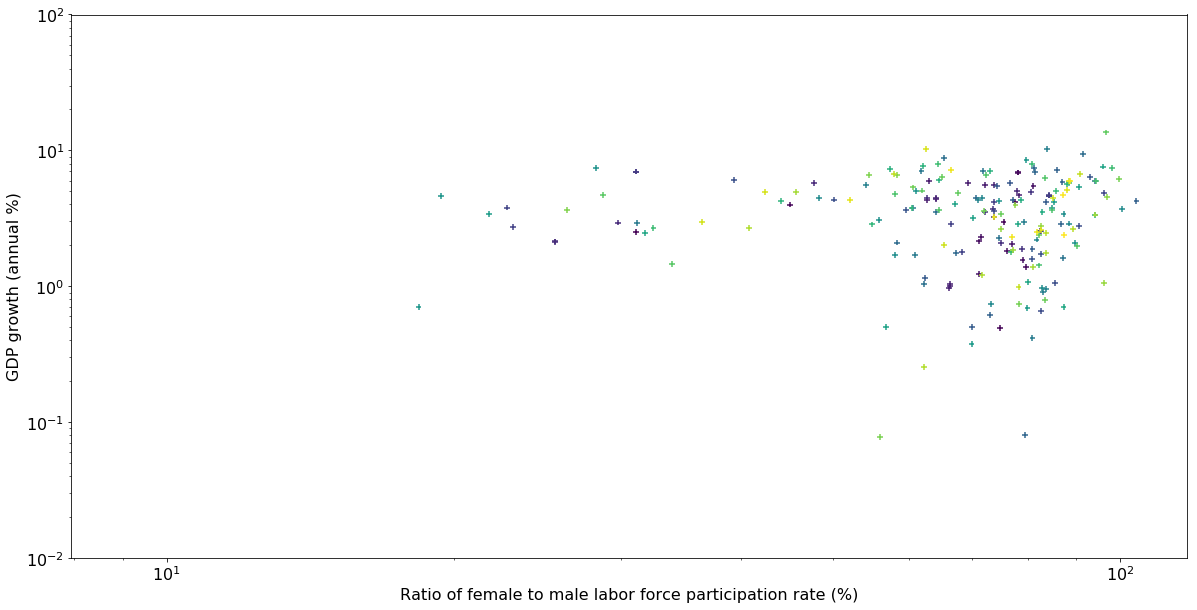

In [34]:
# now let's plot annual GDP% growth rate to Ratio of female to male labor force participation rate (%)
cmap2 = plt.get_cmap('hot')
mycolors2 = cmap(np.linspace(0,1,len(country)))
fig2 = plt.figure()
ax2 = plt.gca()
ax2.set_ylim([0.01,100])
ax2.scatter(ftm_list, gdp_list, s=35, c=mycolors2, marker='+', label=country)
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_xlabel('Ratio of female to male labor force participation rate (%)')
ax2.set_ylabel('GDP growth (annual %)')
plt.savefig('socialSustainProfit.png')

In [35]:
# This *explatory* analysis is super preliminary. 
# Having the idea to look at these correlations was the hardest part
# You can see that there is a very slight trend in positive correlation between
# annual GDP growth rate % and renewable energy consumption, and
# annual GDP growh rate % and the ratio of female to male labor in the workforce
# There are a handful of outliers that show quite strong positive correlations.
# This hints that promotion and marketing of sustainable (environmental and social) actions
# may have a positive effect on GDP growth rate. 
# More studies can surely be done to cross reference more data and infer market drivers.
# I would really love to be able to be part of the data incubator and watch this project flourish!
# :)